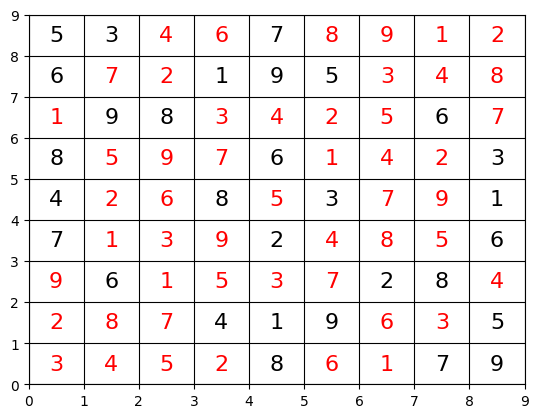

In [135]:
import numpy as np
import matplotlib.pyplot as plt

puzzle = np.array([
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
])


def search_sub_matrix(puzzle, i, j):
    h_start, h_end, v_start, v_end = None, None, None, None
    intervals = [range(0, 3), range(3, 6), range(6, 9)]
    for interval in intervals:
        if i in interval:
            h_start = interval.start
            h_end = interval.stop
        if j in interval:
            v_start = interval.start
            v_end = interval.stop
    return puzzle[h_start:h_end, v_start:v_end]


def solve(puzzle):
    # 第i行第j列
    for i in range(9):
        for j in range(9):
            sub_puzzle = search_sub_matrix(puzzle, i, j)
            if puzzle[i, j] == 0:
                for candidate_num in range(1, 10):
                    if (candidate_num not in puzzle[i, :] and 
                        candidate_num not in puzzle[:, j] and 
                        candidate_num not in sub_puzzle
                    ):
                        puzzle[i, j] = candidate_num
                        if solve(puzzle):
                            return True
                        else:
                            puzzle[i, j] = 0
                return False
    return True


def sudoku(puzzle):
    solve(puzzle)
    return puzzle


def show_result(original, solved):
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(0, 10, 1))
    ax.set_yticks(np.arange(0, 10, 1))
    ax.grid(True, color='black')
    
    for i in range(9):
        for j in range(9):
            num = solved[i, j]
            if original[i, j] == 0:
                color = "red"
            else:
                color = "black"
            ax.text(j + 0.5, 8.5 - i, str(num), color=color,
                    ha='center', va='center', fontsize=16)
            
    plt.show()
    
original = puzzle.copy()
solved = sudoku(puzzle)

show_result(original, solved)

In [56]:
def a(g):
    return False, g

if a(0)[0]:
    print("yes!")
else:
    print("no")

no
